# HW 10: NLP
## Syed Nisar Hussain
### sh07126@st.habib.edu.pk

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

### Part 1 - Named Entity Recognition

In [146]:
nlp = spacy.load('en_core_web_sm')

In [147]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

**Chosen Artice:** Max Verstappen mounts incredible comeback at Sao Paulo GP to all but clinch F1 championship - CNN Sports

In [148]:
ny_bb = url_to_string('https://edition.cnn.com/2024/11/04/sport/sao-paulo-gp-verstappen-f1-spt-intl/index.html')
article = nlp(ny_bb)
len(article.ents)

124

In [149]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 31,
         'GPE': 6,
         'CARDINAL': 15,
         'ORG': 42,
         'LOC': 2,
         'TIME': 4,
         'DATE': 9,
         'PRODUCT': 2,
         'FAC': 2,
         'ORDINAL': 9,
         'LAW': 1,
         'WORK_OF_ART': 1})

In [150]:
items = [x.text for x in article.ents]
Counter(items).most_common(5)

[('CNN', 22),
 ('Max Verstappen', 6),
 ('the Sao Paulo Grand Prix', 4),
 ('Verstappen', 4),
 ('F1', 3)]

In [151]:
sentences = [x for x in article.sents]

s = sentences[13]
print(s)

Verstappen is now 62 points ahead of the McLaren driver and, with three races remaining, will become world champion again if he finishes the next race in Las Vegas on November 23 with a lead of 60 points or more.      


In [152]:
displacy.render(nlp(str(s)), style='ent')

In [153]:
dict([(str(x), x.label_) for x in nlp(str(s)).ents])

{'62': 'CARDINAL',
 'McLaren': 'PERSON',
 'three': 'CARDINAL',
 'Las Vegas': 'GPE',
 'November 23': 'DATE',
 '60': 'CARDINAL'}

In [154]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(s)) if not y.is_stop and y.pos_ != 'PUNCT']]

[('Verstappen', 'PROPN', 'Verstappen'),
 ('62', 'NUM', '62'),
 ('points', 'NOUN', 'point'),
 ('ahead', 'ADV', 'ahead'),
 ('McLaren', 'PROPN', 'McLaren'),
 ('driver', 'NOUN', 'driver'),
 ('races', 'NOUN', 'race'),
 ('remaining', 'VERB', 'remain'),
 ('world', 'NOUN', 'world'),
 ('champion', 'NOUN', 'champion'),
 ('finishes', 'VERB', 'finish'),
 ('race', 'NOUN', 'race'),
 ('Las', 'PROPN', 'Las'),
 ('Vegas', 'PROPN', 'Vegas'),
 ('November', 'PROPN', 'November'),
 ('23', 'NUM', '23'),
 ('lead', 'NOUN', 'lead'),
 ('60', 'NUM', '60'),
 ('points', 'NOUN', 'point'),
 ('     ', 'SPACE', '     ')]

In [155]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

**Findings:** We can observe that the algorithm did decent in the Named Entity Recognition analysis. It was able to correcly identify and name entities such as Max Verstappen being a person, Red Bull & CNN being organizations, and also correctly identifying numerical values like time and dates. This shows that the algorithm is able to perform well in recognizing and naming entities.

**Shortcomings:** The algorithm fails at some points such as classigying both Norris as GPE (Geopolitical Entity) and Lance Stroll as an ORG (Organization) instead of person. Since we also grabbed the entire article, there is also a lot of irrelevant information that has been grabbed and is part of the algorithm, therefore a more deeper data cleaning process is required to only extract the necessary information.

### Part 2 - Word Frequency and Keyword Extraction

From Wikipedia: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, as the transformer approach has become the main architecture of large language models like those based on GPT.

In [156]:
!pip install tika

In [157]:
import tika
from tika import parser

In [158]:
tika.initVM()

In [159]:
raw = parser.from_file('AttentionIsAllYouNeed.pdf')

In [160]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])

In [161]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

In [162]:
filtered_word_freq = nltk.FreqDist(clean_words)
filtered_word_freq.most_common(20)

[('attention', 49),
 ('model', 40),
 ('models', 37),
 ('w', 36),
 ('n', 32),
 ('sequence', 31),
 ('e', 30),
 ('output', 29),
 ('Transformer', 26),
 ('input', 24),
 ('layer', 24),
 ('layers', 23),
 ('translation', 22),
 ('positions', 22),
 ('training', 20),
 ('self-attention', 20),
 ('p', 20),
 ('ad', 20),
 ('Attention', 19),
 ('encoder', 19)]

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

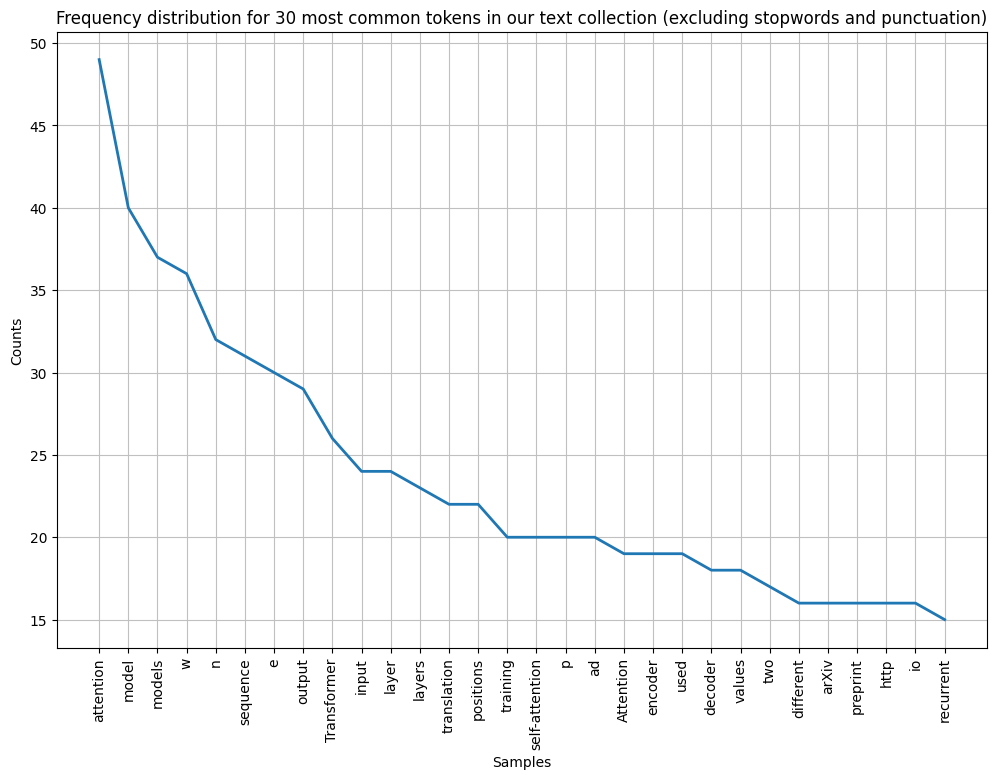

In [163]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

**Findings:** The frequency distribution plot shows that words like attention, model, sequence are some of the most common words that are used in the paper. This makes sense since the topic of the paper itself is about attention and large language models.

In [164]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

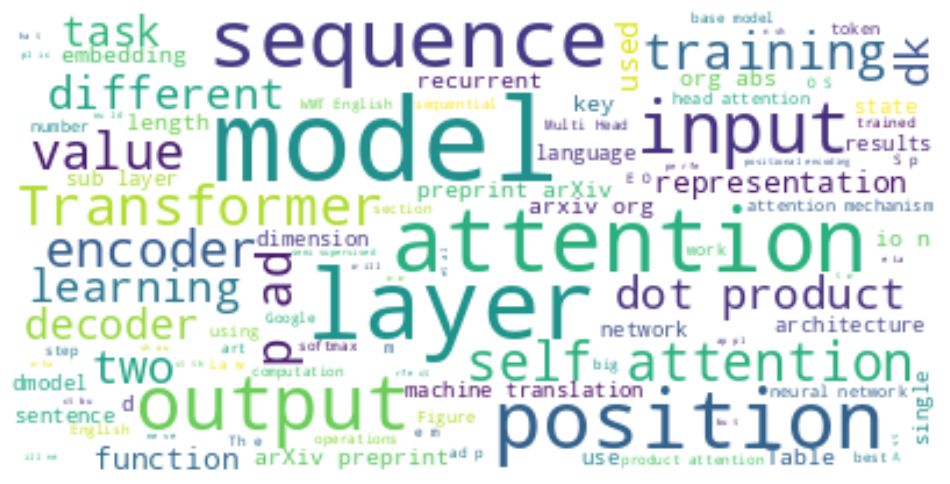

In [165]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

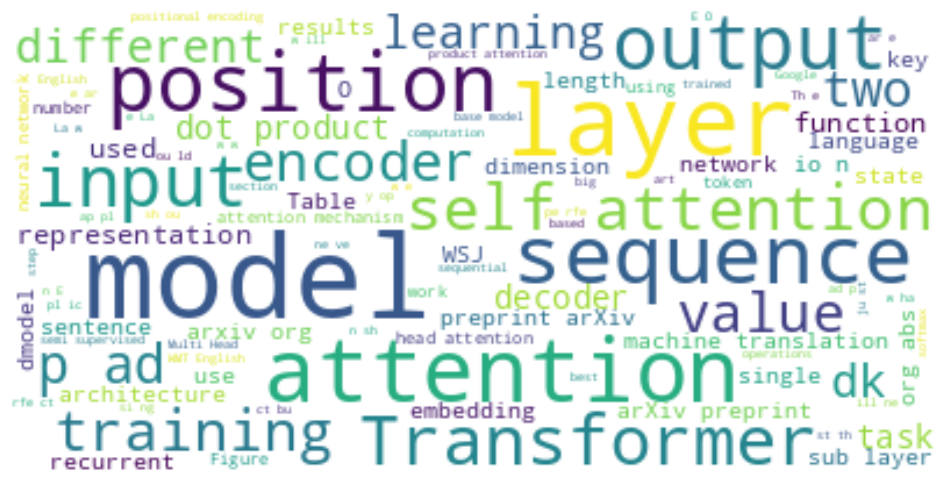

In [166]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Findings:** The word cloud also complements our observation from the frequency distribution plot above since we can observe words like attention, layer, model, Transformer in much larger font which indicates that these words are very frequently used in the paper.

In [ ]:
!pip install rake_nltk

In [168]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(76.98487674448938,
  'n dmodel dff h dk dv pdrop ϵls train ppl bleu params steps'),
 (54.279411764705884,
  'schedule optimizer regularization results machine translation model variations english constituency parsing conclusion'),
 (52.45077805077805, 'input layer5 th e la w w ill ne'),
 (52.45077805077805, 'input layer5 th e la w w ill ne'),
 (52.45077805077805, 'input layer5 th e la w w ill ne'),
 (52.45077805077805, 'input layer5 th e la w w ill ne'),
 (49.98585858585859, '× 106 base 6 512 2048 8 64 64 0'),
 (48.0301724137931,
  'inherently sequential nature precludes parallelization within training examples'),
 (47.68108108108108, 'pa ss ed ne w la w'),
 (47.68108108108108, 'pa ss ed ne w la w')]

**Findings:** The output from rare_nltk algorithm gives the phrases/topics present in the paper, it does an okay job with some of the them however, in others the algorithm gives repeated outputs, this is a shortcoming of this algorithm.

In [169]:
!pip install textacy

In [170]:
import textacy
# from textacy import *

#Load a spacy model, which will be used for all further processing.
en = textacy.load_spacy_lang("en_core_web_sm")

In [171]:
#convert the text into a spacy document.
doc = textacy.make_spacy_doc(raw['content'], lang=en)

#Print the keywords using TextRank algorithm, as implemented in Textacy.
print("Textrank output: \n", textacy.extract.keyterms.textrank(doc,
                                                             normalize="lemma",
                                                             topn=5))

# structured information extraction (textacy.extract)
print("\nPrint all keywords output:")
keywords = [kps for kps, weights in
                            textacy.extract.keyterms.textrank(doc,
                                                              normalize="lemma")]
print(keywords)

Textrank output: 
 [('dk = dv = dmodel', 0.010193962443841156), ('competitive neural sequence transduction model', 0.009992165837110654), ('dominant sequence transduction model', 0.008451659098688563), ('parallel attention layer', 0.008102043201236355), ('german base translation model', 0.008078141889288163)]

Print all keywords output:
['dk = dv = dmodel', 'competitive neural sequence transduction model', 'dominant sequence transduction model', 'parallel attention layer', 'german base translation model', 'sequence model', 'recurrent language model', 'attention key size dk', 'deep recurrent model', 'decoder attention mechanism']


**Findings:** The TextRank algorithm from textacy library, performs really well on this paper since we can observe the keywords that are very relevant to the paper, with the highest scores. This indicates that the algorithm was able to effectively extract the most important keywords/phrases in the text.

In [ ]:
!pip install yake

In [173]:
import yake
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Attention', 0.0020328128261589123)
('arXiv preprint arXiv', 0.0033069240862607418)
('model', 0.0035565287565617804)
('models', 0.0045177527448217215)
('scaled dot-product attention', 0.005108926795868792)
('Transformer', 0.005985220951417241)
('Attention Multi-Head Attention', 0.006106147140215339)
('Neural machine translation', 0.006205960660707835)
('sequence', 0.00788379100735966)
('layer', 0.008596509769916461)
('dot-product attention', 0.008804044799328527)
('multi-head attention', 0.00891030073276994)
('arXiv', 0.00916291677725393)
('arXiv preprint', 0.009456166872442157)
('preprint arXiv', 0.009456166872442157)
('output', 0.009652065428733737)
('neural', 0.009965368546846156)
('neural networks', 0.010016827902513481)
('layers', 0.010091554947293236)
('training', 0.010274015161282566)


**Findings:** The output from yake's algorithm also shows a very good performance on our selected paper since the extracted keywords are some of the most commonly used terms as we also saw with the frequency distribution plot and the word cloud.

From all the methods used here, I believe word cloud is the best way to get an idea of the important keywords in the text and the visualization also gives a good idea in general and is easier to percieve for the average person as well.

### Part 3 - Sentiment Analysis

Q3.txt contains posts on X from Ilya Sutskever, co-founder and cheif scientist at OpenAI

In [174]:
import json
import pandas as pd
import numpy as np
from textblob import TextBlob

In [175]:
file_path = 'Q3.txt'

positive_tweets = []
negative_tweets = []
neutral_tweets = []
total_positive = 0
total_negative = 0

# part a
with open(file_path, 'r') as file:
    for line in file:
        analysis = TextBlob(line)
        if analysis.sentiment.polarity > 0:
            positive_tweets.append(line.strip())
            total_positive += 1
        elif analysis.sentiment.polarity < 0:
            negative_tweets.append(line.strip())
            total_negative += 1
        else:
            neutral_tweets.append(line.strip())

# part b
print(f"Total positive tweets: {total_positive}")
print(f"Total negative tweets: {total_negative}")

Total positive tweets: 12
Total negative tweets: 2


In [176]:
# part c
print(f"Positive tweet: {positive_tweets[3]}")
print(f"Negative tweet: {negative_tweets[1]}")

Positive tweet: There exists no sentence in any language that conveys how happy I am.
Negative tweet: Wrong motivation -> wrong results


**Discussion:** I think that the sentiment analysis algorithm did a fair job in deciding whether the sentiment of a post was positive or negative. We can see that the positive tweet indeed carries a positive sentiment and the negative tweet, even though it is moore of an informative post but it does carry negative sentiment. The algorithm has some shortcomings because it can sometimes fail to detect sarcastic responses or in general, lack the larger context of a remark.

### Part 4 - Recommendation Engine

In [177]:
import pandas as pd
from ast import literal_eval

books_df = pd.read_csv('https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/books_enriched.csv', index_col=[0], converters={"genres": literal_eval})

In [178]:
books_df.head()

,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,image_url,...,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
0,0,['Suzanne Collins'],4.34,2767052,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young-adult, fiction, fantasy, science-fictio...",2767052,https://images.gr-assets.com/books/1447303603m...,...,560092,1481305,2706317,4780653,https://images.gr-assets.com/books/1447303603s...,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254,['Suzanne Collins']
1,1,"['J.K. Rowling', 'Mary GrandPré']",4.44,3,2,491,Harry Potter's life is miserable. His parents ...,"[fantasy, fiction, young-adult, classics]",3,https://images.gr-assets.com/books/1474154022m...,...,455024,1156318,3011543,4602479,https://images.gr-assets.com/books/1474154022s...,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867,"['J.K. Rowling', 'Mary GrandPré']"
2,2,['Stephenie Meyer'],3.57,41865,3,226,About three things I was absolutely positive.\...,"[young-adult, fantasy, romance, fiction, paran...",41865,https://images.gr-assets.com/books/1361039443m...,...,793319,875073,1355439,3866839,https://images.gr-assets.com/books/1361039443s...,"Twilight (Twilight, #1)",3212258,3916824,95009,['Stephenie Meyer']
3,3,['Harper Lee'],4.25,2657,4,487,The unforgettable novel of a childhood in a sl...,"[classics, fiction, historical-fiction, young-...",2657,https://images.gr-assets.com/books/1361975680m...,...,446835,1001952,1714267,3198671,https://images.gr-assets.com/books/1361975680s...,To Kill a Mockingbird,3275794,3340896,72586,['Harper Lee']
4,4,['F. Scott Fitzgerald'],3.89,4671,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"[classics, fiction, historical-fiction, romance]",4671,https://images.gr-assets.com/books/1490528560m...,...,606158,936012,947718,2683664,https://images.gr-assets.com/books/1490528560s...,The Great Gatsby,245494,2773745,51992,['F. Scott Fitzgerald']


In [179]:
books_df = books_df[['book_id', 'title', 'description']]
books_df.head()

,book_id,title,description
0,1,"The Hunger Games (The Hunger Games, #1)",WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...
2,3,"Twilight (Twilight, #1)",About three things I was absolutely positive.\...
3,4,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...
4,5,The Great Gatsby,Alternate Cover Edition ISBN: 0743273567 (ISBN...


In [180]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

In [181]:
def clean_more_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",str(text))
  text=re.sub("(\\d|\\W)+"," ",str(text))
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if clean_more_txt(word)]
  clean_text2 = [word for word in clean_text if clean_more_txt(word)]
  return " ".join(clean_text2)

In [182]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [183]:
books_df['clean_desc'] = books_df['description'].apply(clean_txt)
books_df.head()

,book_id,title,description,clean_desc
0,1,"The Hunger Games (The Hunger Games, #1)",WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,win mean fame fortune lose mean certain death ...
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...,harry potter life miserable parent dead hes st...
2,3,"Twilight (Twilight, #1)",About three things I was absolutely positive.\...,three things absolutely positive first edward ...
3,4,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,unforgettable novel childhood sleepy southern ...
4,5,The Great Gatsby,Alternate Cover Edition ISBN: 0743273567 (ISBN...,alternate cover edition isbn isbn great gatsby...


a. TF-IDF Method

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_bookid = tfidf_vectorizer.fit_transform((books_df['clean_desc'])) #fitting and transforming the vector

In [185]:
print(books_df['clean_desc'][0])

win mean fame fortune lose mean certain death hunger game begin ruin place know north america lie nation panem shin capitol surround twelve outlying district capitol harsh cruel keep district line force send one boy girl age twelve eighteen participate annual hunger game fight death live sixteen year old katniss everdeen regard death sentence step forward take sisters place game katniss close dead survival second nature without really mean become contender win start make choices weight survival humanity life love


In [186]:
print(tfidf_bookid[0,:])

  (0, 47640)	0.14700615362454644
  (0, 27240)	0.1968229820123769
  (0, 14954)	0.10462847468374223
  (0, 16133)	0.09795368066596528
  (0, 25522)	0.06401478359690713
  (0, 6963)	0.09217620893233304
  (0, 10472)	0.18339332077063375
  (0, 20221)	0.2107434838815266
  (0, 16768)	0.23736725057652058
  (0, 3845)	0.05411791589450568
  (0, 37280)	0.09333730366477222
  (0, 33194)	0.12470827772539553
  (0, 23691)	0.046045986927436715
  (0, 30301)	0.09021788855316708
  (0, 1337)	0.07725326182936056
  (0, 24934)	0.07598404013193716
  (0, 29529)	0.09613039855814126
  (0, 31806)	0.16139819772596392
  (0, 39227)	0.11781848774950703
  (0, 6374)	0.28993997502392976
  (0, 42059)	0.0948976240646315
  (0, 44767)	0.19134538368744955
  (0, 31411)	0.17859243450232828
  (0, 11894)	0.2555515014712011
  (0, 18811)	0.11508419906207122
  :	:
  (0, 30875)	0.053050137301798236
  (0, 23038)	0.3101685621586569
  (0, 14416)	0.1579769255162815
  (0, 35861)	0.11083339753921383
  (0, 38702)	0.11508419906207122
  (0, 41165)

In [187]:
query = books_df.iloc[[1]]
query

,book_id,title,description,clean_desc
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...,harry potter life miserable parent dead hes st...


In [188]:
from sklearn.metrics.pairwise import cosine_similarity

#convert query input to TF-IDF
user_tfidf = tfidf_vectorizer.transform(query['clean_desc'])

#Calculate similarity score of query data with every record in the original data
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_bookid)
output2 = list(cos_similarity_tfidf)

In [189]:
def get_recommendation(top, resume, scores):
  recommendation = pd.DataFrame(columns = ['title', 'clean_desc', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'title'] = books_df['title'][i]
      recommendation.at[count, 'clean_desc'] = books_df['clean_desc'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

In [190]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
results = get_recommendation(top,books_df, list_scores)
results

,title,clean_desc,score
0,Harry Potter and the Sorcerer's Stone (Harry P...,harry potter life miserable parent dead hes st...,1.0
1,Harry Potter and the Chamber of Secrets (Harry...,ever since harry potter come home summer dursl...,0.416969
2,Harry Potter and the Prisoner of Azkaban (Harr...,harry potter third year hogwarts full new dang...,0.347928
3,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",box set contain harry potter sorcerers stone h...,0.302646
4,Harry Potter and the Goblet of Fire (Harry Pot...,harry potter midway train wizard come age harr...,0.294744
5,Harry Potter and the Half-Blood Prince (Harry ...,war voldemort well even muggle governments not...,0.290802
6,"The Harry Potter Collection 1-4 (Harry Potter,...",excite tales harry potter young wizard train t...,0.287252
7,The First Fifteen Lives of Harry August,stories tell one lifetime harry august deathbe...,0.273384
8,The Guns of August,stories tell one lifetime harry august deathbe...,0.273384
9,Harry Potter: Film Wizardry,harry potter film wizardry give readers front ...,0.270068


b. Word2Vec (Doc2Vec) Model

In [191]:
# Importing necessary libraries here
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore') # no warnings

In [192]:
#splitting the description into words
corpus = []
for words in books_df['clean_desc']:
    corpus.append(words.split())

In [193]:
#tag each document
documents = [TaggedDocument(doc, [str(books_df['book_id'][i])]) for i, doc in enumerate(corpus)]

In [194]:
max_epochs = 5
vec_size = 15
alpha = 0.025

dl_model = Doc2Vec(vector_size=vec_size,
                alpha=alpha,
                min_alpha=0.00025,
                min_count=1,
                dm =1,
                epochs=max_epochs)

dl_model.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    dl_model.train(documents,
                total_examples=dl_model.corpus_count,
                epochs=dl_model.epochs)
    # decrease the learning rate
    dl_model.alpha -= 0.0002
    # fix the learning rate, no decay
    dl_model.min_alpha = dl_model.alpha

iteration 0


iteration 1
iteration 2
iteration 3
iteration 4


In [195]:
# row 2 in the data
dl_model[1]

array([-0.64208734, -0.15021738,  0.514592  , -1.121681  ,  3.23498   ,
       -0.37052494, -0.06771471, -0.56534857, -0.04452405, -0.39914826,
        0.805291  , -0.62839353, -0.45909548, -1.9306297 ,  0.06355161],
      dtype=float32)

In [196]:
dl_model.wv.most_similar('magic',topn=10)

[('realm', 0.8902289867401123),
 ('creatures', 0.8785765767097473),
 ('sketchbooks', 0.8496534824371338),
 ('changelings', 0.8282727599143982),
 ('shiver', 0.8201628923416138),
 ('shadowclan', 0.8157799243927002),
 ('crysania', 0.8138163089752197),
 ('power', 0.8101925253868103),
 ('vestigial', 0.8059043288230896),
 ('americaerik', 0.8057085871696472)]

In [197]:
dl_model.save("books_doc2vec.model")

In [198]:
query = books_df['clean_desc'][1]
query

'harry potter life miserable parent dead hes stick heartless relatives force live tiny closet stairs fortune change receive letter tell truth hes wizard mysterious visitor rescue relatives take new home hogwarts school witchcraft wizardry lifetime bottle magical power harry finally feel like normal kid even within wizarding community special boy live person ever survive kill curse inflict evil lord voldemort launch brutal takeover wizarding world vanish fail kill harry though harry first year hogwarts best life everything perfect dangerous secret object hide within castle wall harry believe responsibility prevent fall evil hand bring contact force terrify ever could imagine full sympathetic character wildly imaginative situations countless excite detail first installment series assemble unforgettable magical world set stage many high stake adventure come'

In [199]:
query_data_tokenize = word_tokenize(query)
v1 = dl_model.infer_vector(query_data_tokenize)
similar_records=dl_model.dv.most_similar([v1])

In [200]:
similar_records

[('2', 0.9457050561904907),
 ('1560', 0.8804154396057129),
 ('7081', 0.8772217631340027),
 ('3769', 0.871540367603302),
 ('1394', 0.8423339128494263),
 ('8477', 0.840493381023407),
 ('266', 0.8282662630081177),
 ('4179', 0.8275443315505981),
 ('220', 0.8266487717628479),
 ('1304', 0.826392650604248)]

In [201]:
indexes = []
for i in range(10):
    idx = books_df[books_df['book_id']==int(similar_records[i][0])]
    idx['score'] = similar_records[i][1]
    indexes.append(idx.index[0])
    print(idx[['title','score']])

                                               title     score
1  Harry Potter and the Sorcerer's Stone (Harry P...  0.945705
                      title     score
1466  Switched (Trylle, #1)  0.880415
                                                  title     score
6136  The Lives of Christopher Chant (Chrestomanci, #2)  0.877222
                                                  title    score
3470  Midnight for Charlie Bone (The Children of the...  0.87154
                                    title     score
1308  White Night (The Dresden Files, #9)  0.842334
                                  title     score
7163  The Worst Witch (Worst Witch, #1)  0.840493
                               title     score
240  Kiss the Girls (Alex Cross, #2)  0.828266
                                title     score
3819  xxxHolic, Vol. 1 (xxxHOLiC, #1)  0.827544
                                                 title     score
198  Twilight: The Complete Illustrated Movie Compa...  0.826649
            

In [202]:
books_df['clean_desc'][idx.index[0]]

'harry dresden chicagos professional wizard worse assignments undercover set adult film dodge flame monkey poo instance toe leaf walk plant monster still something trouble usual newest case film producer believe hes target sinister entropy curse women around die increasingly spectacular ways harry doubly frustrate get involve bizarre mystery favor thomas flirtatious self absorb vampire acquaintance dubious integrity thomas personal stake case harry cant quite figure investigation lead straight thomas oversexed vampire family harry discover thomas family tree hide shock secret revelation change harry life forever'

c. **Comparision:**

With the TF-IDF method, we gave Harry Potter Sorcerer's Stone as the query and in recommendations, the highest scores were of all the other books in the Harry Potter series, and some other books with Harry in their name. This shows that the recommendation engine did good with the recommendations, although it may indicate that it is focusing too much on the outer details like similar words to get recommendations, it may not necessarily be the case that one Harry Potter book is similar in story with the other.

On the other hand, the Doc2Vec model also does well with the recommendations. The same query was given to the model and its output is slightly different than TF-IDF, it doesn't include the other Harry Potter series at all, however it does give recommendations such as Artemis Fowl, which shares some similar themes like magic etc.